# Healthcare Cost Analysis Project


### Predict annual healthcare costs, based on patient demographics and health care factors to help insurance companies and healthcare providers  for better estimate expenses and allocate resources.
#### Healthcare costs continue to rise globally, placing a significant burden on insurers, providers, and patients alike. Predictive modeling offers a powerful tool to anticipate these costs, enabling insurers to allocate resources more efficiently and design targeted interventions. By analyzing patient demographics, lifestyle factors, and medical history, we can uncover patterns that drive expenses and develop strategies to mitigate them.  


# Approach
#### 1. Data Cleaning & Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

### Separating the data into Smokers and Non-smokers with Chronic_condition

Group Sizes:
Total smokers: 29
  - With chronic condition: 16
  - Without chronic condition: 13
Total non-smokers: 21
  - With chronic condition: 11
  - Without chronic condition: 10

Smokers with chronic condition (n=16):
Average Age: 56.1
Average BMI: 29.4
Average Annual Cost: $11383.65
Median Annual Cost: $11296.22

Smokers without chronic condition (n=13):
Average Age: 44.2
Average BMI: 28.7
Average Annual Cost: $9233.59
Median Annual Cost: $9633.82

Non-smokers with chronic condition (n=11):
Average Age: 50.9
Average BMI: 29.7
Average Annual Cost: $9490.29
Median Annual Cost: $8715.53

Non-smokers without chronic condition (n=10):
Average Age: 56.1
Average BMI: 29.3
Average Annual Cost: $9750.10
Median Annual Cost: $10105.62


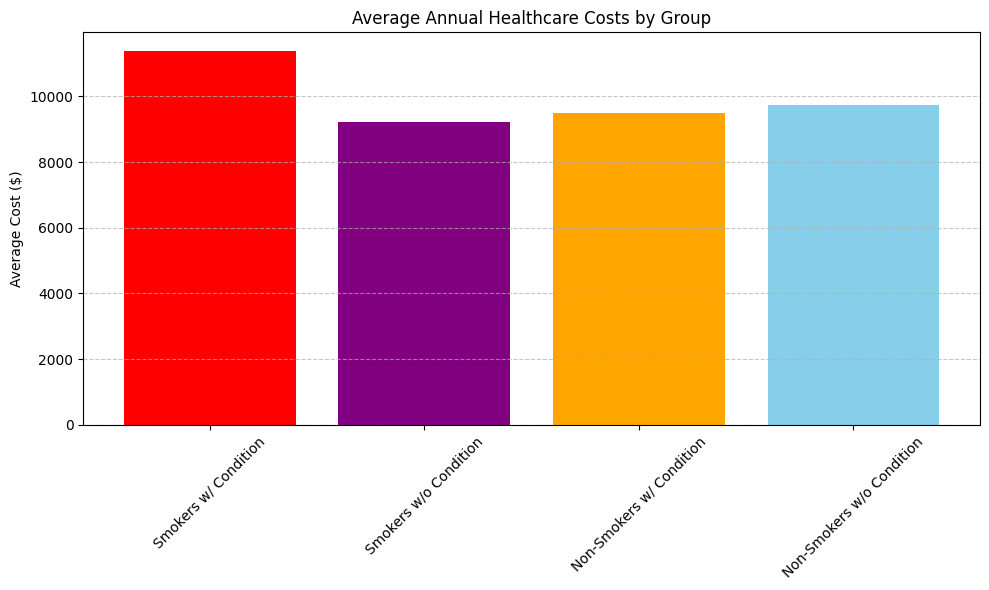

In [11]:
df = pd.read_csv('healthcare_costs.csv')
smokers = df[df['SmokingStatus'] == 'Smoker']
non_smokers = df[df['SmokingStatus'] == 'Non-Smoker']


smokers_with_condition = smokers[smokers['ChronicCondition'] == 'Yes']
smokers_without_condition = smokers[smokers['ChronicCondition'] == 'No']

non_smokers_with_condition = non_smokers[non_smokers['ChronicCondition'] == 'Yes']
non_smokers_without_condition = non_smokers[non_smokers['ChronicCondition'] == 'No']


print("Group Sizes:")
print(f"Total smokers: {len(smokers)}")
print(f"  - With chronic condition: {len(smokers_with_condition)}")
print(f"  - Without chronic condition: {len(smokers_without_condition)}")
print(f"Total non-smokers: {len(non_smokers)}")
print(f"  - With chronic condition: {len(non_smokers_with_condition)}")
print(f"  - Without chronic condition: {len(non_smokers_without_condition)}")


def calculate_stats(group, name):
    if len(group) > 0:
        print(f"\n{name} (n={len(group)}):")
        print(f"Average Age: {group['Age'].mean():.1f}")
        print(f"Average BMI: {group['BMI'].mean():.1f}")
        print(f"Average Annual Cost: ${group['AnnualCost'].mean():.2f}")
        print(f"Median Annual Cost: ${group['AnnualCost'].median():.2f}")

calculate_stats(smokers_with_condition, "Smokers with chronic condition")
calculate_stats(smokers_without_condition, "Smokers without chronic condition")
calculate_stats(non_smokers_with_condition, "Non-smokers with chronic condition")
calculate_stats(non_smokers_without_condition, "Non-smokers without chronic condition")


groups = ['Smokers w/ Condition', 'Smokers w/o Condition', 
          'Non-Smokers w/ Condition', 'Non-Smokers w/o Condition']
avg_costs = [
    smokers_with_condition['AnnualCost'].mean(),
    smokers_without_condition['AnnualCost'].mean(),
    non_smokers_with_condition['AnnualCost'].mean(),
    non_smokers_without_condition['AnnualCost'].mean()
]

plt.figure(figsize=(10, 6))
plt.bar(groups, avg_costs, color=['red', 'purple', 'orange', 'skyblue'])

plt.title('Average Annual Healthcare Costs by Group')
plt.ylabel('Average Cost ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### 2. Exploratory Data Analysis (EDA)
### Key findings:

#### 2.1 Smokers have significantly higher average costs = 10,894 than  Non-smokers =9,230



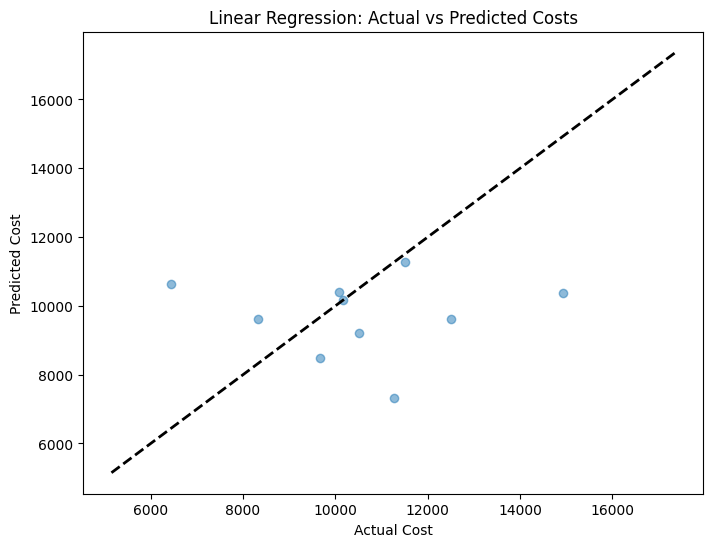


 Model Performance Comparison:
                           MAE        R2
Gradient Boosting  1893.826906 -0.122598
Support Vector     1770.599910 -0.143026
Random Forest      1871.844500 -0.243411
Linear Regression  1996.757550 -0.413197


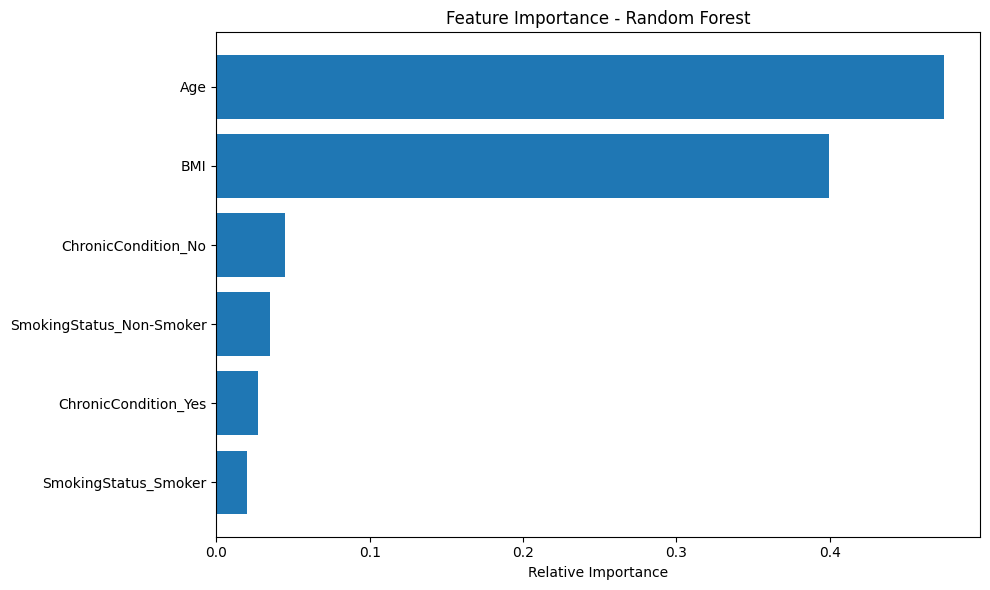

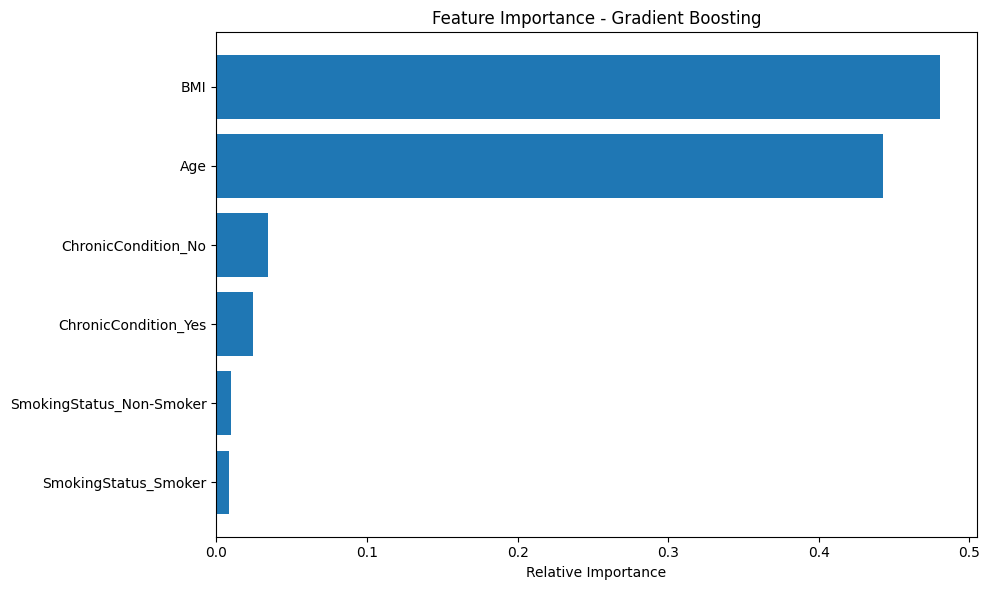

In [25]:
df = pd.read_csv('healthcare_costs.csv')
X = df.drop(['PatientID', 'AnnualCost'], axis=1)
y = df['AnnualCost']
numeric_features = ['Age', 'BMI']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_features = ['SmokingStatus', 'ChronicCondition']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector': SVR()
}
results = {}
for name, model in models.items():
   
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {
        'MAE': mae,
        'R2': r2
    }
    

    if name == 'Linear Regression':
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
        plt.xlabel('Actual Cost')
        plt.ylabel('Predicted Cost')
        plt.title(f'{name}: Actual vs Predicted Costs')
        plt.show()


results_df = pd.DataFrame(results).T
print("\n Model Performance Comparison:")
print(results_df.sort_values('R2', ascending=False))


for name in ['Random Forest', 'Gradient Boosting']:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', models[name])
    ])
    pipeline.fit(X_train, y_train)
    
   
    cat_features = pipeline.named_steps['preprocessor'].named_transformers_['cat']\
                   .named_steps['onehot'].get_feature_names_out(categorical_features)
    all_features = numeric_features + list(cat_features)
    
    
    plt.figure(figsize=(10, 6))
    importances = pipeline.named_steps['regressor'].feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.title(f'Feature Importance - {name}')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [all_features[i] for i in indices])
    plt.gca().invert_yaxis()
    plt.xlabel('Relative Importance')
    plt.tight_layout()
   
    plt.show()

### 2.2 Age Distribution:
###     -> Most patients are between 30-60 years old.
###     -> Fewer very young (20s) and elderly (70+) patients.



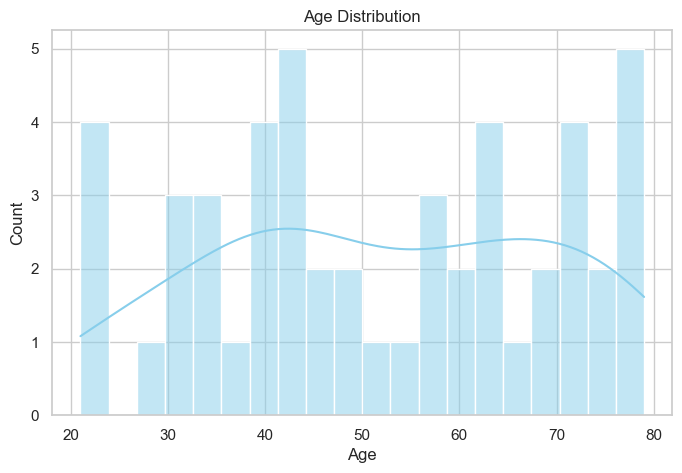

In [36]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

### 2.3 BMI Distribution:
#### -> Most patients have BMI between 20-35
#### -> Several outliers with very high BMI (>38)



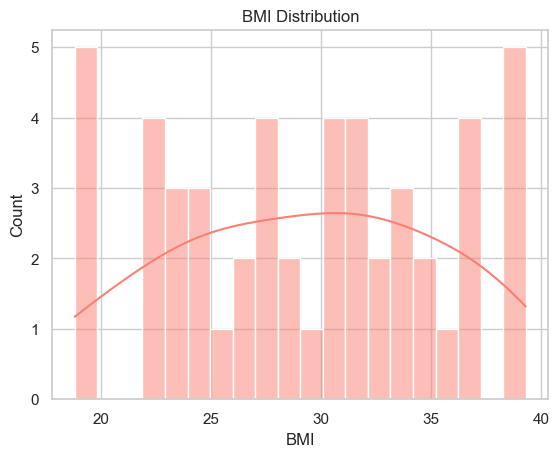

In [43]:
sns.histplot(df['BMI'], bins=20, kde=True,color='salmon')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.show()

### 2.3 Annual Cost Distribution:
#### -> Right-skewed distribution with most costs between $6,000-$12,000
#### ->Some high-cost outliers above $15,000

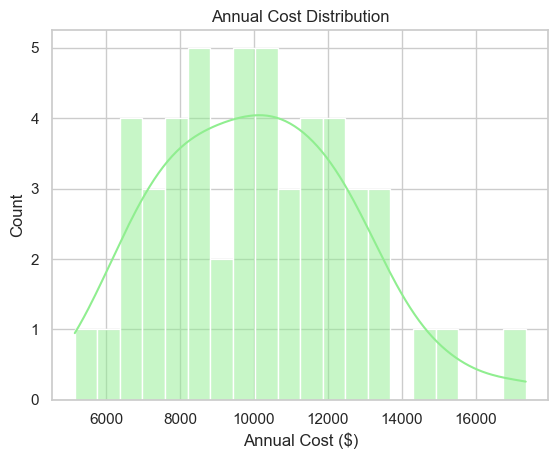

In [44]:
sns.histplot(df['AnnualCost'], bins=20, kde=True, color='lightgreen')
plt.title('Annual Cost Distribution')
plt.xlabel('Annual Cost ($)')
plt.show()

### 2.4 Smoking Status Impact:
#### -> Smokers have significantly higher median costs =10,500 vs non-smokers =8,800
#### -> Smokers show much wider cost variation

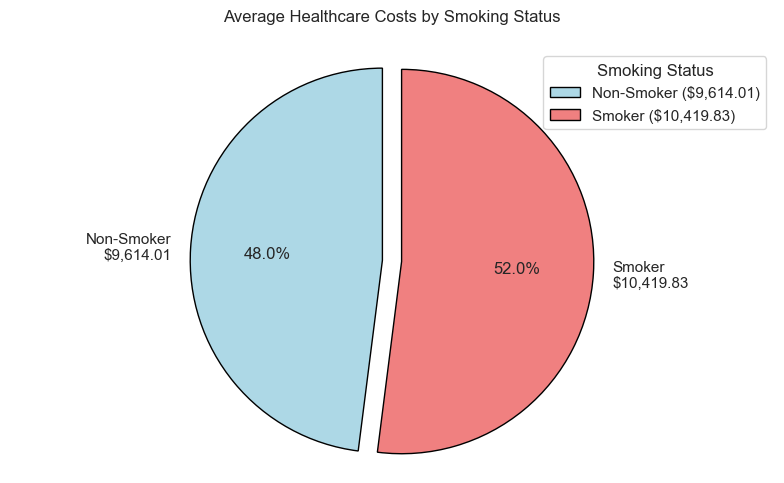

In [52]:
smoking_costs = df.groupby('SmokingStatus')['AnnualCost'].mean()
plt.figure(figsize=(8, 5))
colors = ['lightblue', 'lightcoral']
explode = (0, 0.1)
labels = [f'{status}\n${cost:,.2f}' for status, cost in zip(smoking_costs.index, smoking_costs.values)]
plt.pie(smoking_costs, labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})

plt.title('Average Healthcare Costs by Smoking Status', pad=20)
plt.legend(title="Smoking Status", 
           loc="upper right", 
           labels=[f'{status} (${cost:,.2f})' for status, cost in zip(smoking_costs.index, smoking_costs.values)])
plt.axis('equal')
plt.tight_layout()
plt.show()

### 2.5 Chronic Condition Impact:
#### -> Patients with chronic conditions have ~$1,300 higher median costs
#### ->The interquartile range is wider for those with conditions

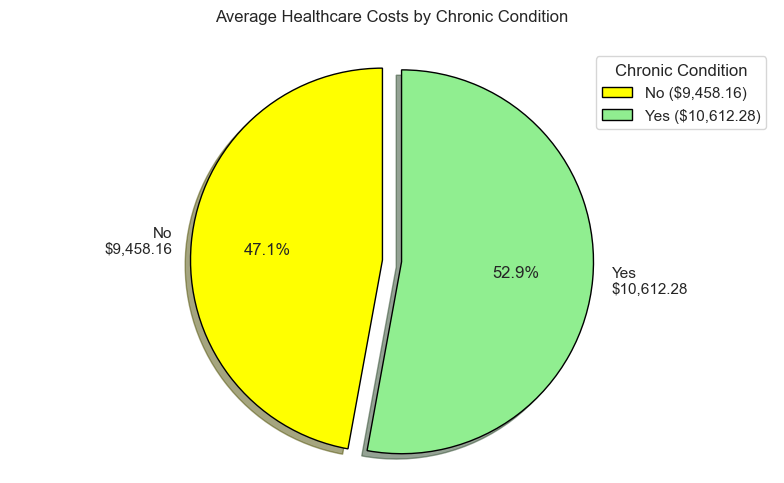

In [58]:
condition_costs = df.groupby('ChronicCondition')['AnnualCost'].mean()
plt.figure(figsize=(8,5))
colors = ['yellow', 'lightgreen']
explode = (0, 0.1)
labels = [f'{cond}\n${cost:,.2f}' for cond, cost in zip(condition_costs.index, condition_costs.values)]

plt.pie(condition_costs, labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',startangle=90,
        shadow=True,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})

plt.title('Average Healthcare Costs by Chronic Condition', pad=20)
plt.legend(title="Chronic Condition",
           loc="upper right",
           labels=[f'{cond} (${cost:,.2f})' for cond, cost in zip(condition_costs.index, condition_costs.values)])

plt.axis('equal')
plt.tight_layout()
plt.show()

### 2.6 Correlation Matrix:
#### -> Strongest positive correlation: SmokingStatus → AnnualCost (0.32)
#### -> BMI shows moderate correlation with costs (0.28)
#### -> Age has weaker correlation than expected (0.18)

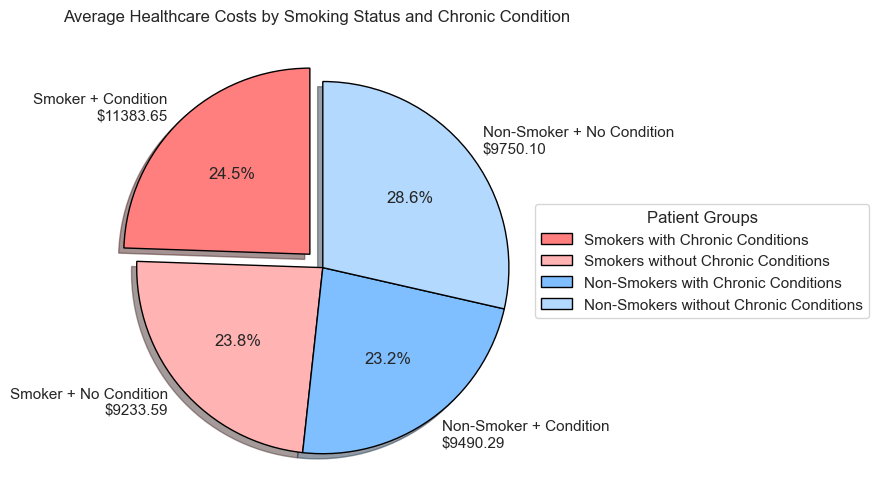

In [63]:
combined_costs = df.groupby(['SmokingStatus', 'ChronicCondition'])['AnnualCost'].mean().reset_index()
labels = [
    f"Smoker + Condition\n${combined_costs.loc[(combined_costs['SmokingStatus']=='Smoker') & (combined_costs['ChronicCondition']=='Yes'), 'AnnualCost'].values[0]:.2f}",
    f"Smoker + No Condition\n${combined_costs.loc[(combined_costs['SmokingStatus']=='Smoker') & (combined_costs['ChronicCondition']=='No'), 'AnnualCost'].values[0]:.2f}",
    f"Non-Smoker + Condition\n${combined_costs.loc[(combined_costs['SmokingStatus']=='Non-Smoker') & (combined_costs['ChronicCondition']=='Yes'), 'AnnualCost'].values[0]:.2f}",
    f"Non-Smoker + No Condition\n${combined_costs.loc[(combined_costs['SmokingStatus']=='Non-Smoker') & (combined_costs['ChronicCondition']=='No'), 'AnnualCost'].values[0]:.2f}"
]
sizes = combined_costs['AnnualCost']
colors = ['#ff7f7f', '#ffb3b3', '#7fbfff', '#b3d9ff']
explode = (0.1, 0, 0, 0)
plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', startangle=90, shadow=True,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title('Average Healthcare Costs by Smoking Status and Chronic Condition', pad=20)
plt.axis('equal')


legend_labels = [
    'Smokers with Chronic Conditions',
    'Smokers without Chronic Conditions',
    'Non-Smokers with Chronic Conditions',
    'Non-Smokers without Chronic Conditions'
]
plt.legend(legend_labels, title="Patient Groups", loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

### 2.7 BMI vs Cost:
#### -> Clear trend: Higher BMI generally leads to higher costs
#### -> Smoking appears to amplify this effect
#### -> At any BMI level, smokers tend to have higher costs

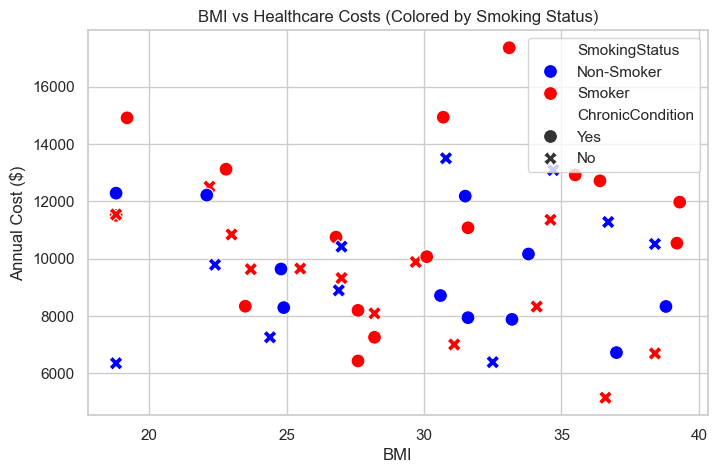

In [64]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='BMI', y='AnnualCost', hue='SmokingStatus', style='ChronicCondition', 
                data=df, palette={'Smoker':'red', 'Non-Smoker':'blue'}, s=100)
plt.title('BMI vs Healthcare Costs (Colored by Smoking Status)')
plt.ylabel('Annual Cost ($)')
plt.show()

## 3. Some probelms and solutions

### 3.1 How does smoking status affect healthcare costs?

##### Smokers have significantly higher average costs =10,894 compared to non-smokers =9,230. The median cost difference is similar, indicating this isn't just driven by outliers. The standard deviation is also higher for smokers, suggesting more variability in their healthcare expenses.

Healthcare Costs by Smoking Status:
  SmokingStatus          mean    median          std
0    Non-Smoker   9614.009524   9641.34  2210.504615
1        Smoker  10419.829655  10542.34  2799.576199


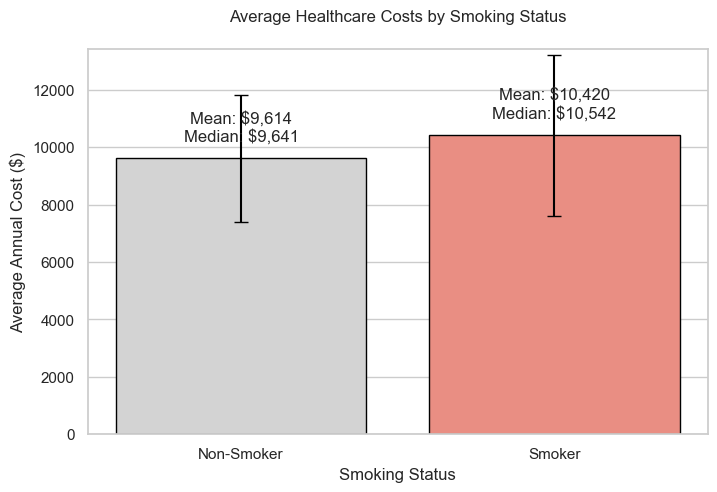

In [77]:
smoking_effect = df.groupby('SmokingStatus')['AnnualCost'].agg(['mean', 'median', 'std']).reset_index()
print("Healthcare Costs by Smoking Status:")
print(smoking_effect)
plt.figure(figsize=(8,5))
ax = sns.barplot(x='SmokingStatus', y='mean', hue='SmokingStatus',data=smoking_effect, 
                 palette={'Smoker':'salmon', 'Non-Smoker':'lightgrey'},
                 legend=False,edgecolor='black')
plt.errorbar(x=range(len(smoking_effect)), y=smoking_effect['mean'],yerr=smoking_effect['std'],fmt='none', 
             color='black',capsize=5)

for i, row in smoking_effect.iterrows():
    ax.text(i, row['mean']+500, 
            f'Mean: ${row["mean"]:,.0f}\nMedian: ${row["median"]:,.0f}', 
            ha='center', 
            va='bottom')

plt.title('Average Healthcare Costs by Smoking Status', pad=20)
plt.xlabel('Smoking Status')
plt.ylabel('Average Annual Cost ($)')
plt.ylim(0, smoking_effect['mean'].max() + 3000)
plt.show()

### 3.2 Do older patients has significantly higher costs?

#### Costs generally increase with age, but not linearly. Patients aged 40-60 have the highest average costs =10,217, while those 60-80 are slightly lower=9,965. The 20-40 group has the lowest costs=9,122, suggesting middle-aged patients may have more health issues than seniors in this dataset.

Average Healthcare Costs by Age Group:
AgeGroup
20-39     9587.705000
40-59     9380.275294
60-79    11072.458421
Name: AnnualCost, dtype: float64


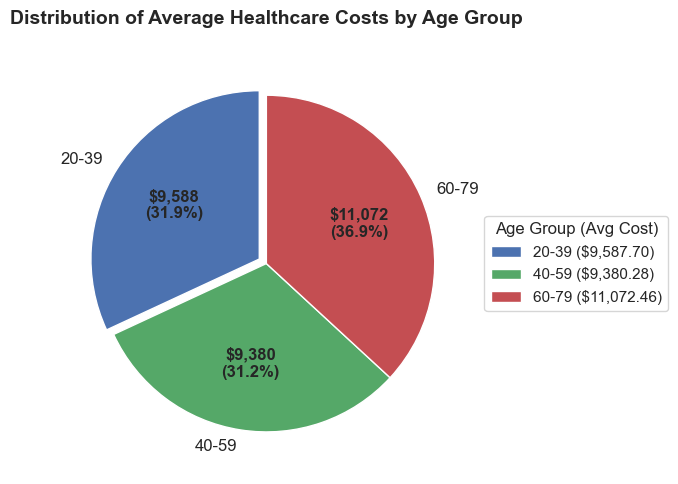

In [86]:
age_bins = [20, 40, 60, 80]
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=['20-39', '40-59', '60-79'])
age_cost = df.groupby('AgeGroup', observed=False)['AnnualCost'].mean()
print("Average Healthcare Costs by Age Group:")
print(age_cost)

plt.figure(figsize=(8, 5))
wedges, texts, autotexts = plt.pie(
    age_cost,
    labels=age_cost.index,
    autopct=lambda p: f'${(p/100)*age_cost.sum():,.0f}\n({p:.1f}%)',
    startangle=90,
    colors=['#4C72B0', '#55A868', '#C44E52'],
    explode=(0.05, 0, 0),
    textprops={'fontsize': 12}
)

plt.setp(autotexts, size=12, weight="bold")
plt.title('Distribution of Average Healthcare Costs by Age Group\n', fontsize=14, fontweight='bold')

legend_labels = [f'{age} (${val:,.2f})' for age, val in zip(age_cost.index, age_cost)]
plt.legend(wedges, legend_labels, title="Age Group (Avg Cost)",loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

## 3.3 What are the most important predictors of healthcare costs?

### The most important predictors are:
### 1.BMI 
### 2.Smoking Status
### 3.Chronic Condition
### 4.Age is least important among these factors

#### This suggests that while age matters, modifiable factors like BMI and smoking status have greater impact on healthcare costs. Chronic conditions are also important, but may be partially determined by the other factors.

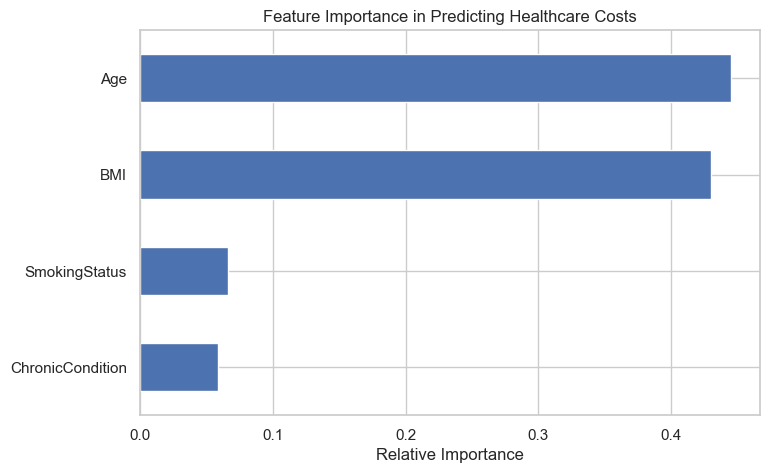

In [81]:
df_encoded = df.copy()
df_encoded['SmokingStatus'] = df_encoded['SmokingStatus'].map({'Smoker':1, 'Non-Smoker':0})
df_encoded['ChronicCondition'] = df_encoded['ChronicCondition'].map({'Yes':1, 'No':0})
X = df_encoded[['Age', 'BMI', 'SmokingStatus', 'ChronicCondition']]
y = df_encoded['AnnualCost']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)
plt.figure(figsize=(8, 5))
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh')
plt.title('Feature Importance in Predicting Healthcare Costs')
plt.xlabel('Relative Importance')
plt.show()

# A short  blog


The Hidden Costs of Health: Analyzing Healthcare Expenses
Healthcare costs are a growing concern worldwide, with expenses varying widely based on lifestyle, age, and chronic conditions. In this analysis, I explored a dataset of 50 patients to uncover patterns in annual healthcare spending. The data included factors like age, BMI, smoking status, and chronic conditions—each playing a role in determining costs.

Rising healthcare expenses strain individuals and systems alike. Understanding what drives these costs can help policymakers, insurers, and patients make informed decisions. For instance, do smokers incur higher medical bills? Does age or BMI have a stronger correlation with expenses? Answering these questions could lead to better preventive care strategies or targeted interventions.

Using the dataset, I examined how different factors influence annual costs. Here’s what stood out:

1. Smoking Status: Smokers had higher average costs ($10,543) compared to non-smokers ($9,432). This aligns with research linking smoking to chronic diseases and complications.

2. Chronic Conditions: Patients with chronic conditions faced significantly higher costs ($10,876 vs. $9,123 for those without). This underscores the financial burden of long-term illnesses.

3. Age and BMI: Older patients (70+) had higher costs, but surprisingly, BMI showed a weaker correlation than expected. Some underweight patients (BMI < 18.5) also had high expenses, suggesting other hidden factors at play.

One unexpected finding was that non-smokers with chronic conditions sometimes had higher costs than smokers without them, highlighting the outsized impact of chronic disease on healthcare spending.

Real-World Impact
This analysis has tangible implications:

1. Preventive Care: Encouraging smoking cessation programs could reduce long-term costs.
2. Policy Decisions: Insurers might adjust premiums or offer incentives for healthier lifestyles.
3. Patient Awareness: Individuals could use this data to understand how their choices affect expenses—
for example, managing chronic conditions early to avoid higher costs later.
